Nombre de lignes avant nettoyage: 33666
Nombre de lignes après nettoyage: 33666


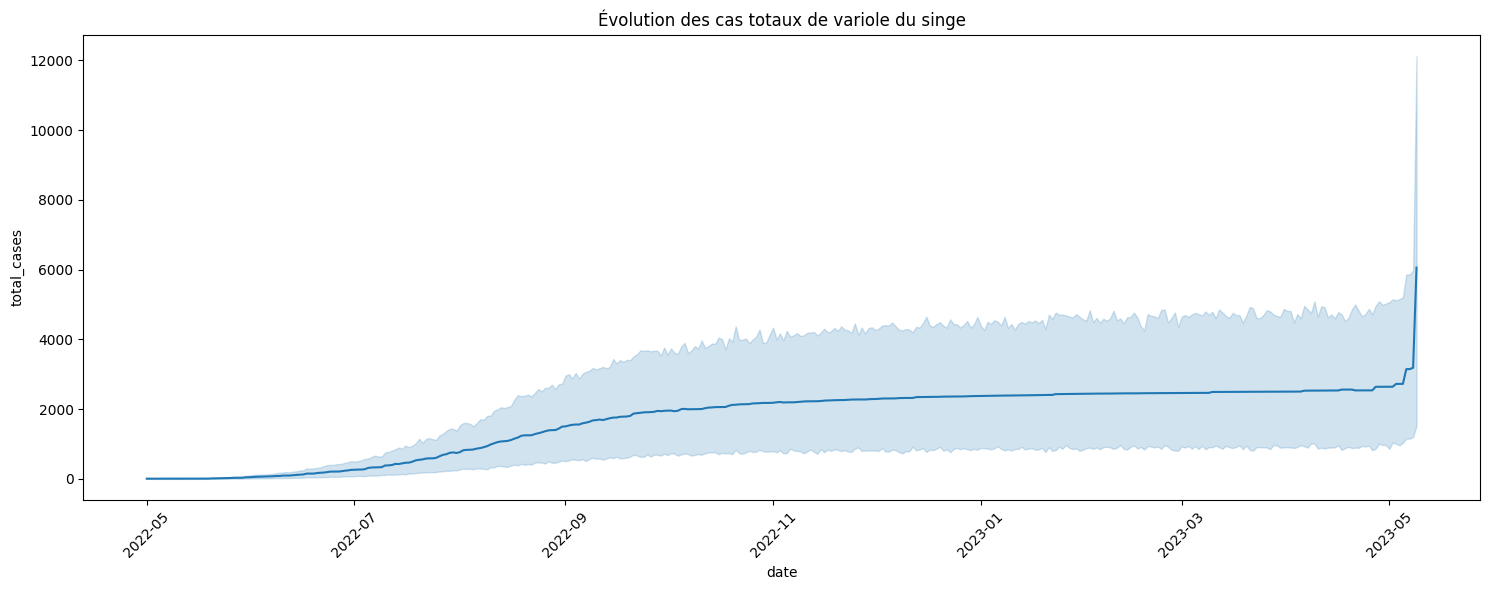

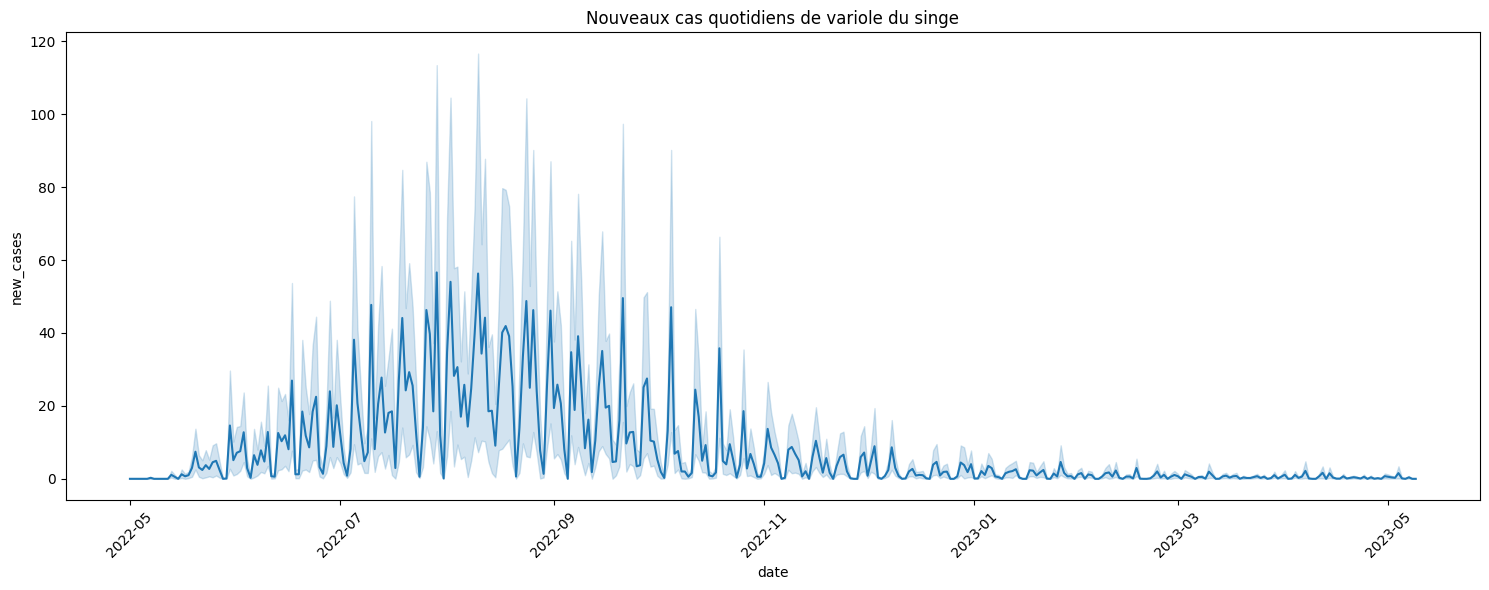

In [2]:
# ====== MONKEYPOX ANALYSE ======

# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nettoyage des données
def nettoyer_monkeypox():
    df_monkeypox = pd.read_csv('owid-monkeypox-data.csv')
    df_clean = df_monkeypox.copy()
    
    # Conversion de la date
    df_clean['date'] = pd.to_datetime(df_clean['date'])
    
    # Nettoyage des colonnes numériques
    colonnes_numeriques = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']
    df_clean[colonnes_numeriques] = df_clean[colonnes_numeriques].fillna(0)
    
    df_clean = df_clean.drop_duplicates()
    df_clean['month_year'] = df_clean['date'].dt.to_period('M')
    
    for col in colonnes_numeriques:
        df_clean[col] = df_clean[col].clip(lower=0)
    
    df_clean = df_clean[df_clean['total_cases'] >= df_clean['new_cases']]
    df_clean = df_clean[df_clean['total_deaths'] >= df_clean['new_deaths']]
    
    return df_clean

# Appliquer le nettoyage
df_monkeypox_clean = nettoyer_monkeypox()

# Afficher les informations sur les données
print("Nombre de lignes avant nettoyage:", len(pd.read_csv('owid-monkeypox-data.csv')))
print("Nombre de lignes après nettoyage:", len(df_monkeypox_clean))

# Visualisation des données
# Évolution des cas totaux
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_monkeypox_clean, x='date', y='total_cases')
plt.title('Évolution des cas totaux de variole du singe')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Nouveaux cas quotidiens
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_monkeypox_clean, x='date', y='new_cases')
plt.title('Nouveaux cas quotidiens de variole du singe')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sauvegarder les données nettoyées
df_monkeypox_clean.to_csv('monkeypox_clean.csv', index=False)

Aperçu des données :
  location  iso_code       date  total_cases  total_deaths  new_cases  \
0   Africa  OWID_AFR 2022-05-01         27.0           2.0        0.0   
1   Africa  OWID_AFR 2022-05-02         27.0           2.0        0.0   
2   Africa  OWID_AFR 2022-05-03         27.0           2.0        0.0   
3   Africa  OWID_AFR 2022-05-04         27.0           2.0        0.0   
4   Africa  OWID_AFR 2022-05-05         27.0           2.0        0.0   

   new_deaths  new_cases_smoothed  new_deaths_smoothed  new_cases_per_million  \
0         0.0                0.29                  0.0                    0.0   
1         0.0                0.29                  0.0                    0.0   
2         0.0                0.29                  0.0                    0.0   
3         0.0                0.29                  0.0                    0.0   
4         0.0                0.29                  0.0                    0.0   

   total_cases_per_million  new_cases_smoothed_per_mi

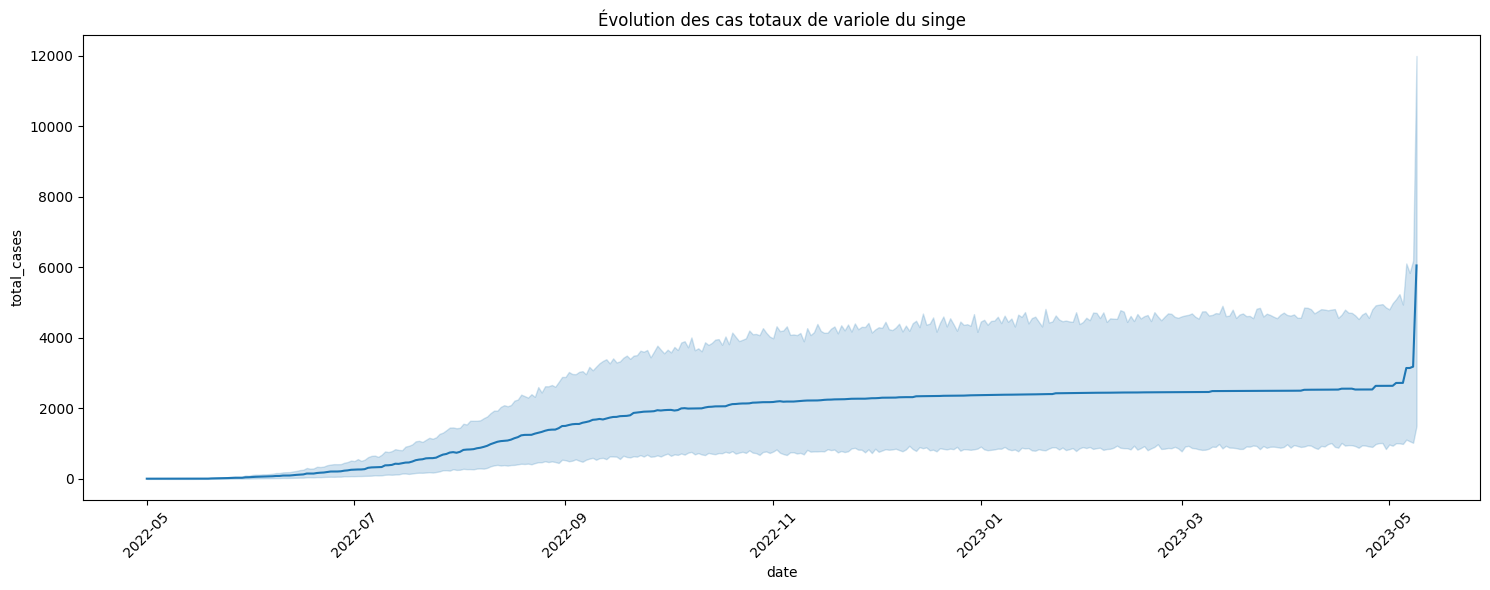

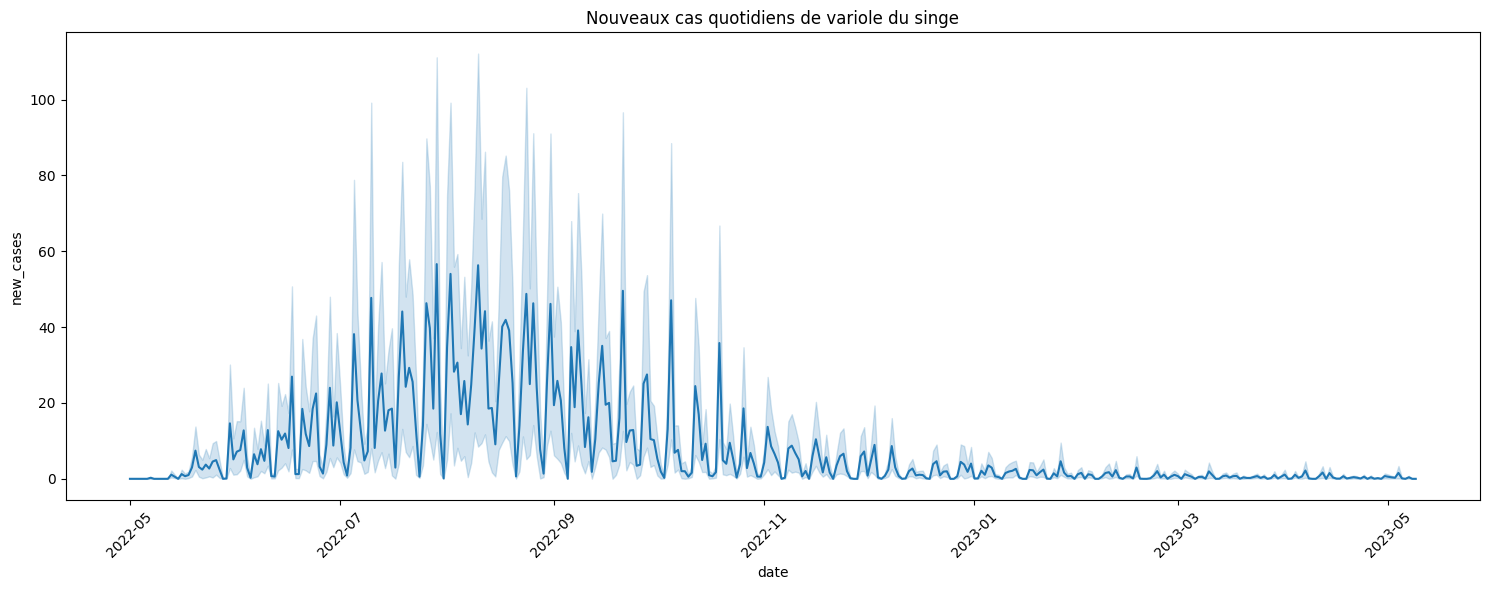

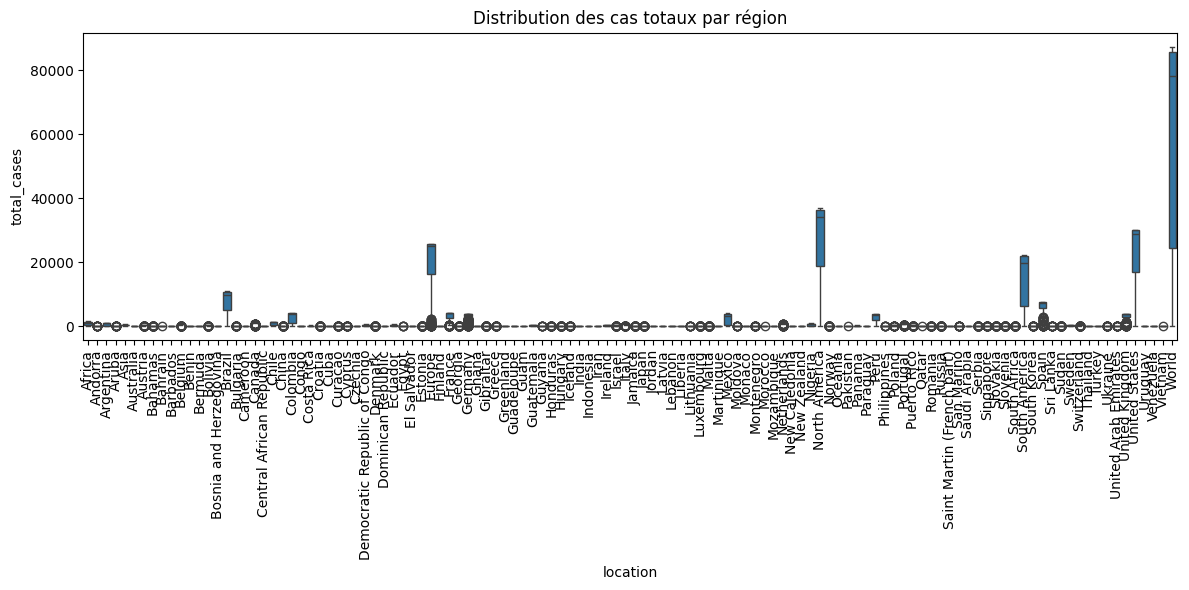


Statistiques descriptives :
        total_cases     new_cases  total_deaths
count  33666.000000  33666.000000  33666.000000
mean    1938.869809      7.783728      1.708489
std     8459.303549     63.686045      8.497967
min        0.000000      0.000000      0.000000
25%        4.000000      0.000000      0.000000
50%       21.000000      0.000000      0.000000
75%      257.000000      0.000000      0.000000
max    87376.000000   1802.000000    140.000000


In [3]:
# Import des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier CSV
df = pd.read_csv('owid-monkeypox-data.csv')

# Convertir la colonne date en datetime
df['date'] = pd.to_datetime(df['date'])

# Afficher les premières lignes du DataFrame
print("Aperçu des données :")
print(df.head())

# Afficher les informations sur le DataFrame
print("\nInformations sur le dataset :")
print(df.info())

# Création de visualisations

# 1. Évolution des cas totaux dans le temps
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='date', y='total_cases')
plt.title('Évolution des cas totaux de variole du singe')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Nouveaux cas par jour
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='date', y='new_cases')
plt.title('Nouveaux cas quotidiens de variole du singe')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Comparaison des cas par région
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='location', y='total_cases')
plt.xticks(rotation=90)
plt.title('Distribution des cas totaux par région')
plt.tight_layout()
plt.show()

# Afficher quelques statistiques descriptives
print("\nStatistiques descriptives :")
print(df[['total_cases', 'new_cases', 'total_deaths']].describe())